# 2.Fáza Predspracovanie dát
#### Petrina 50%, Ivacek 50%

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, PowerTransformer, RobustScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier

In [149]:
connections = pd.read_csv('data/connections.csv', 
                   sep='\t', 
                   header=0)
connections.head(10)

,ts,imei,mwra,c.katana,c.android.gm,c.dogalize,c.android.chrome,c.android.youtube,c.raider,c.android.vending,c.UCMobile.x86,c.updateassist,c.UCMobile.intl
0,2018-05-05 10:00:00,359043379931766452,0.0,11.06115,12.03060,9.91193,11.61488,14.41566,0.00630,50.61159,59.89217,10.61973,29.26605
1,2018-05-05 10:01:00,3590433799317661479,1.0,10.36927,13.33058,10.47183,5.81122,13.42850,0.00335,42.15179,33.30329,37.55184,79.39223
2,2018-05-05 10:02:00,863033069630348941,1.0,11.13179,11.55974,10.19114,9.48536,11.48909,0.00687,31.98880,57.96025,98.36767,67.51165
3,2018-05-05 10:03:00,863033069630348891,0.0,18.55737,7.52229,9.76952,10.09019,8.59293,11.20737,63.24643,68.14477,1.25216,70.80992
4,2018-05-05 10:04:00,863033069630348982,1.0,16.23621,6.46232,14.43755,10.06295,7.56208,1.10024,52.21213,62.91701,39.23750,4.40841
5,2018-05-05 10:05:00,359043379931766890,0.0,12.65449,11.31760,12.80750,7.63353,6.94398,0.03072,46.84296,72.10419,65.21307,53.36385
6,2018-05-05 10:06:00,8630330696303482394,1.0,7.51715,9.71631,11.16790,14.25744,11.86472,0.00040,55.64279,51.34929,11.43310,93.70164
7,2018-05-05 10:07:00,8630330696303481552,1.0,10.42239,11.16408,15.36993,12.40764,15.72517,0.00342,39.94261,78.25351,78.85671,51.24171
8,2018-05-05 10:08:00,8630330696303482410,0.0,16.96537,7.81786,11.74992,8.24555,13.41690,2.28102,51.88202,51.86428,77.53953,71.13616
9,2018-05-05 10:09:00,8630330696303481289,0.0,11.72449,10.31466,7.08285,9.68121,13.50829,0.01218,41.56365,63.83457,63.27459,1.02142


In [150]:
processes = pd.read_csv('data/processes.csv', 
                   sep='\t', 
                   header=0)
processes.head(10)

,ts,imei,mwra,p.android.gm,p.android.chrome,p.android.packageinstaller,p.android.externalstorage,p.android.settings,p.android.documentsui,p.system,...,p.inputmethod.latin,p.katana,p.process.gapps,p.browser.provider,p.gms.persistent,p.android.vending,p.notifier,p.simulator,p.dogalize,p.android.defcontainer
0,2018-05-05 10:00:00,359043379931766452,0.0,4.76403,10.88071,11.51360,11.78927,9.99354,6.87053,13.51346,...,79.29044,10.79383,83.63731,6.32371,98.02549,68.85903,71.53462,2.25715,93.42594,21.75571
1,2018-05-05 10:01:00,3590433799317661479,1.0,11.46891,8.28988,7.09764,13.77786,15.06889,12.69941,12.31459,...,45.98593,99.59445,98.05942,7.98917,95.75324,84.32885,28.67616,33.34162,74.46069,50.49767
2,2018-05-05 10:02:00,863033069630348941,1.0,14.17447,10.60933,10.48707,11.42372,12.21700,15.63323,10.68789,...,80.90579,39.15136,35.96190,39.82428,23.28994,11.66910,73.73339,94.80023,29.08949,53.56893
3,2018-05-05 10:03:00,863033069630348891,0.0,13.24902,12.97128,14.07949,12.04242,15.05862,14.44617,13.38765,...,73.85500,85.74165,89.95390,23.31018,85.76856,83.81530,77.31641,77.72672,82.13086,77.27342
4,2018-05-05 10:04:00,863033069630348982,1.0,10.03368,9.47160,8.07917,14.44551,15.64555,8.80989,7.84002,...,19.27745,26.95881,61.93643,71.64654,85.38242,49.78533,37.98503,90.32310,39.01098,5.83207
5,2018-05-05 10:05:00,359043379931766890,0.0,12.10487,7.06790,10.77449,11.54052,13.25847,8.67721,8.88003,...,63.77575,66.61781,32.08551,48.18337,34.87881,99.56064,23.62307,23.62557,30.64260,16.19268
6,2018-05-05 10:06:00,8630330696303482394,1.0,11.20547,13.54670,6.01785,13.97898,9.35211,8.64164,14.59811,...,62.71154,6.37995,49.26883,14.26143,35.61887,99.91404,78.01157,0.10921,85.78794,3.44839
7,2018-05-05 10:07:00,8630330696303481552,1.0,9.43152,11.19937,10.16669,13.59798,12.60449,14.07398,15.60397,...,68.55050,74.45278,46.79925,99.01885,12.66284,62.62353,22.11113,9.42886,74.13334,84.01403
8,2018-05-05 10:08:00,8630330696303482410,0.0,9.40552,11.05332,10.70500,12.36928,11.72829,12.71607,11.03679,...,80.48845,68.66819,78.93986,70.78193,4.54058,3.58426,84.71937,40.42517,54.45794,30.66241
9,2018-05-05 10:09:00,8630330696303481289,0.0,7.14433,11.25230,14.82949,14.69164,13.77117,11.75249,10.76002,...,28.58429,11.06029,92.74713,92.41559,40.25147,33.18383,59.26034,77.34647,32.94507,63.39220


### Ocistenie dat

In [151]:
# Odstranenie duplicit
connections.drop_duplicates( inplace=True)
processes.drop_duplicates(inplace=True)

In [152]:
# Spojenie tabuliek Connections a Processes podla imei a ts
df = pd.merge(connections, processes, on=['imei', 'ts','mwra'], how='outer')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14978 entries, 0 to 14977
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          14978 non-null  object 
 1   imei                        14978 non-null  int64  
 2   mwra                        14978 non-null  float64
 3   c.katana                    14978 non-null  float64
 4   c.android.gm                14978 non-null  float64
 5   c.dogalize                  14978 non-null  float64
 6   c.android.chrome            14978 non-null  float64
 7   c.android.youtube           14978 non-null  float64
 8   c.raider                    14978 non-null  float64
 9   c.android.vending           14978 non-null  float64
 10  c.UCMobile.x86              14978 non-null  float64
 11  c.updateassist              14978 non-null  float64
 12  c.UCMobile.intl             14978 non-null  float64
 13  p.android.gm                149

#### Odstranenie *ts* atriuty z tabulky

In [153]:
df.drop(columns=["ts"], inplace=True)

#### Vybrali sme tabulky Connections a Processes s ktorými budeme dalej pokračovať pretože podla nas stacia na predikovanie mrwa. Tabulky Devices a Profiles dalej nebudeme podla nas potrebovat

## 2.1 Realizácia a predspracovanie dát
### (A-1b) Dáta si rozdeľte na trénovaciu a testovaciu množinu podľa vami preddefinovaného pomeru. Ďalej pracujte len s trénovacím datasetom.

In [154]:
x = df.drop(columns='mwra')
y = df['mwra']

In [155]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.2, random_state=1)

### (B-1b) Transformujte dáta na vhodný formát pre ML t.j. jedno pozorovanie musí byť opísané jedným riadkom a každý atribút musí byť v numerickom formáte (encoding). zIteratívne integrujte aj kroky v predspracovaní dát z prvej fázy (missing values, outlier detection) ako celok. 

In [156]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)

    return a[(a > upper) | (a < lower)]

In [157]:
def filter_outliers(df,column,action):
    outliers = identify_outliers(df[column])
    if action == 'delete':
        df.drop(index=outliers.index,inplace=True)
    elif action == 'replace':
        lower_bound = df[column].quantile(0.05)
        upper_bound = df[column].quantile(0.95)

        df[column] = np.where(
            df[column] < lower_bound, lower_bound,
            np.where(df[column] > upper_bound, upper_bound, df[column])
        )

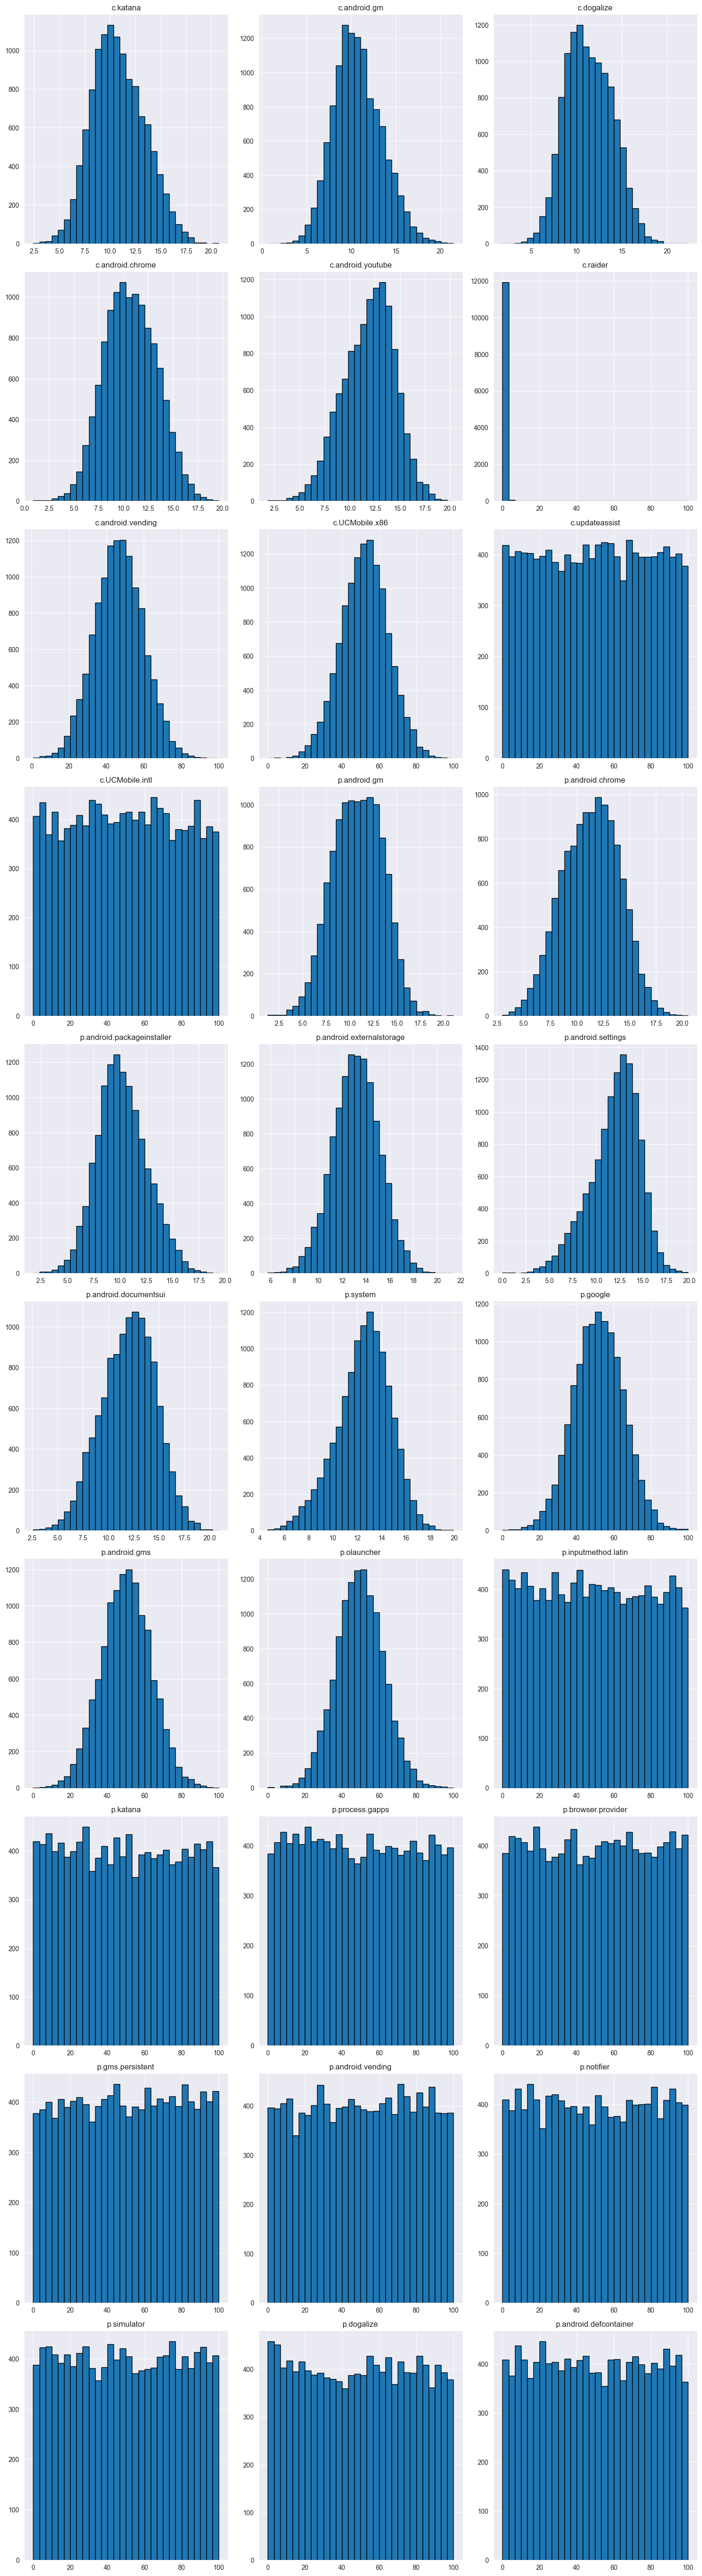

In [158]:
numeric_columns = [col for col in x_train.columns if col not in ['imei']]

num_cols = len(numeric_columns)
fig, axes = plt.subplots(nrows=num_cols // 3 + 1, ncols=3, figsize=(15, num_cols * 2))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    axes[i].hist(x_train[col].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

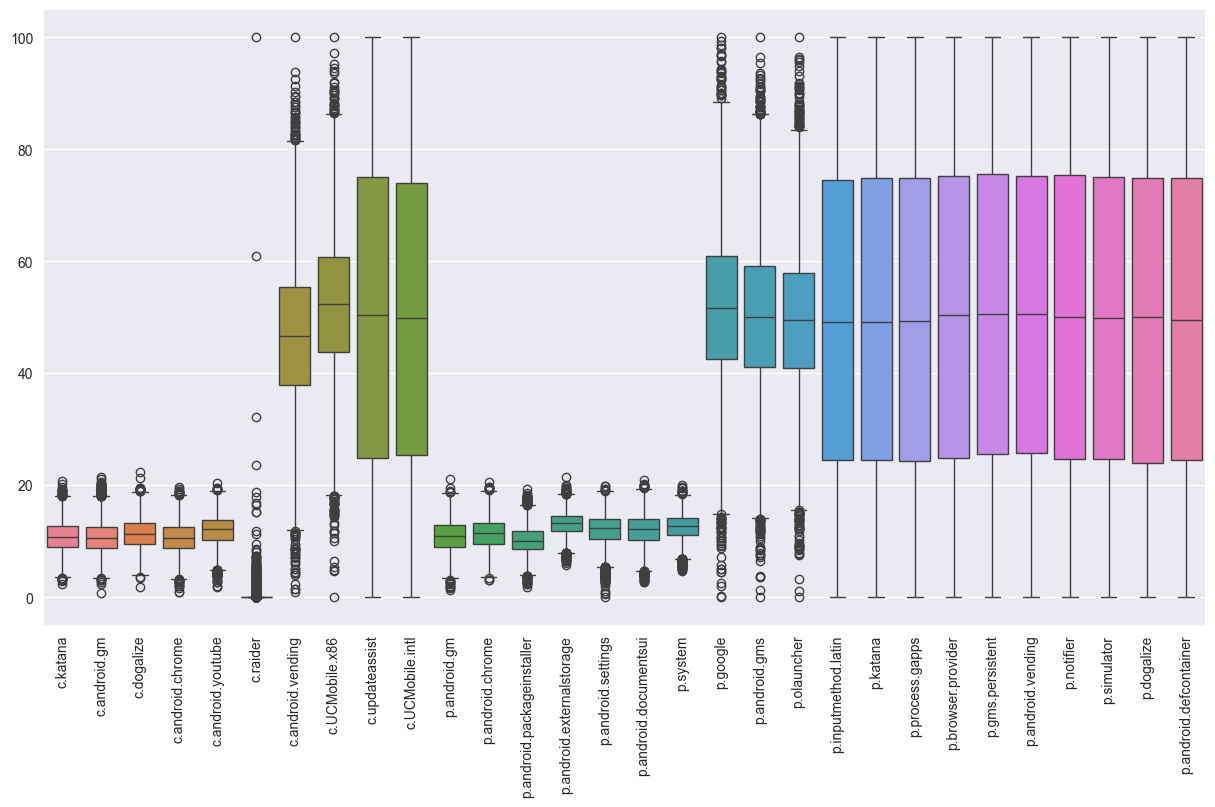

In [139]:
numeric_columns = x_train.columns
numeric_columns = [col for col in numeric_columns if col not in ['imei', 'mwra']]
    
plt.figure(figsize=(15, 8))
sns.boxplot(data=x_train[numeric_columns], orient='v')
plt.xticks(rotation=90)
plt.show()


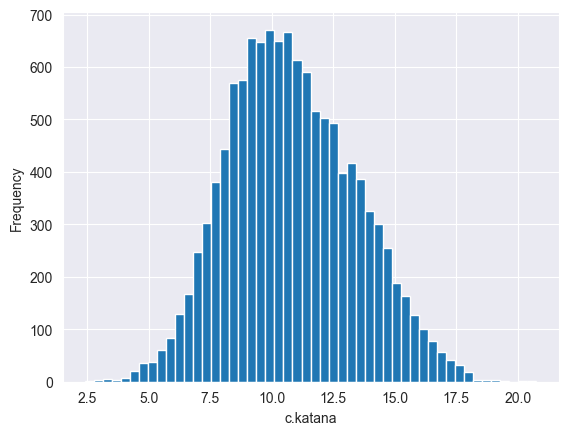

In [140]:
x_train['c.katana'].plot.hist(bins=50, xlabel="c.katana")
plt.show()

<Axes: >

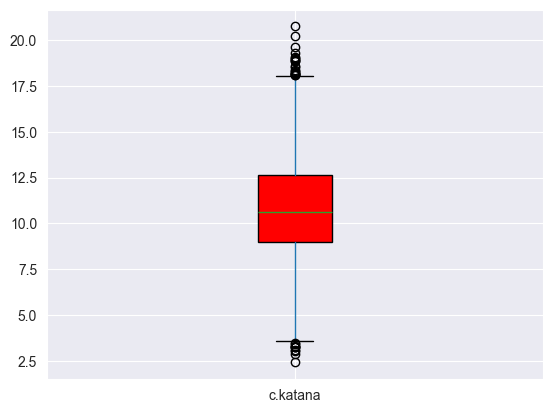

In [141]:
x_train.boxplot(column='c.katana', patch_artist=True, boxprops=dict(facecolor='red'))

In [159]:
filter_outliers(x_train,'c.katana',action='delete')

<Axes: >

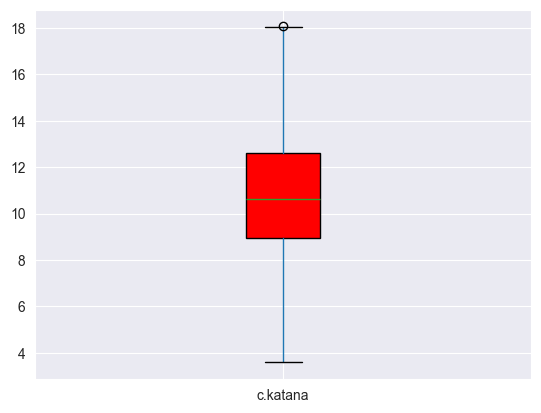

In [143]:
x_train.boxplot(column='c.katana', patch_artist=True, boxprops=dict(facecolor='red'))

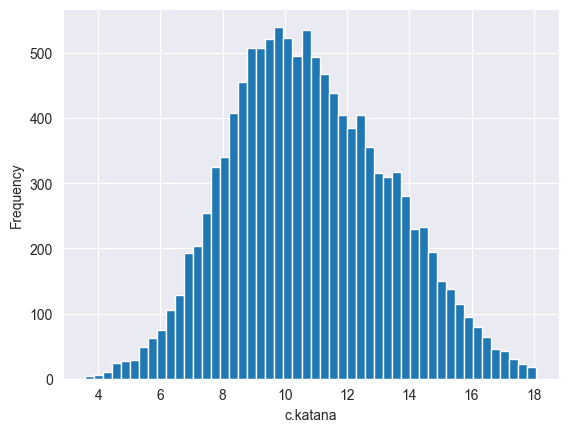

In [144]:
x_train['c.katana'].plot.hist(bins=50, xlabel="c.katana")
plt.show()

In [160]:
columns_to_edit = [
    'c.android.gm', 'c.dogalize', 'c.android.chrome', 'c.android.youtube', 
    'c.katana', 'c.android.vending', 'c.UCMobile.x86', 'c.updateassist', 
    'c.UCMobile.intl', 'p.android.gm', 'p.android.chrome', 'p.android.packageinstaller', 
    'p.android.externalstorage', 'p.android.settings', 'p.android.documentsui', 
    'p.system', 'p.google', 'p.android.gms', 'p.olauncher'
]

for column in columns_to_edit:
    filter_outliers(x_train, column, action='delete')

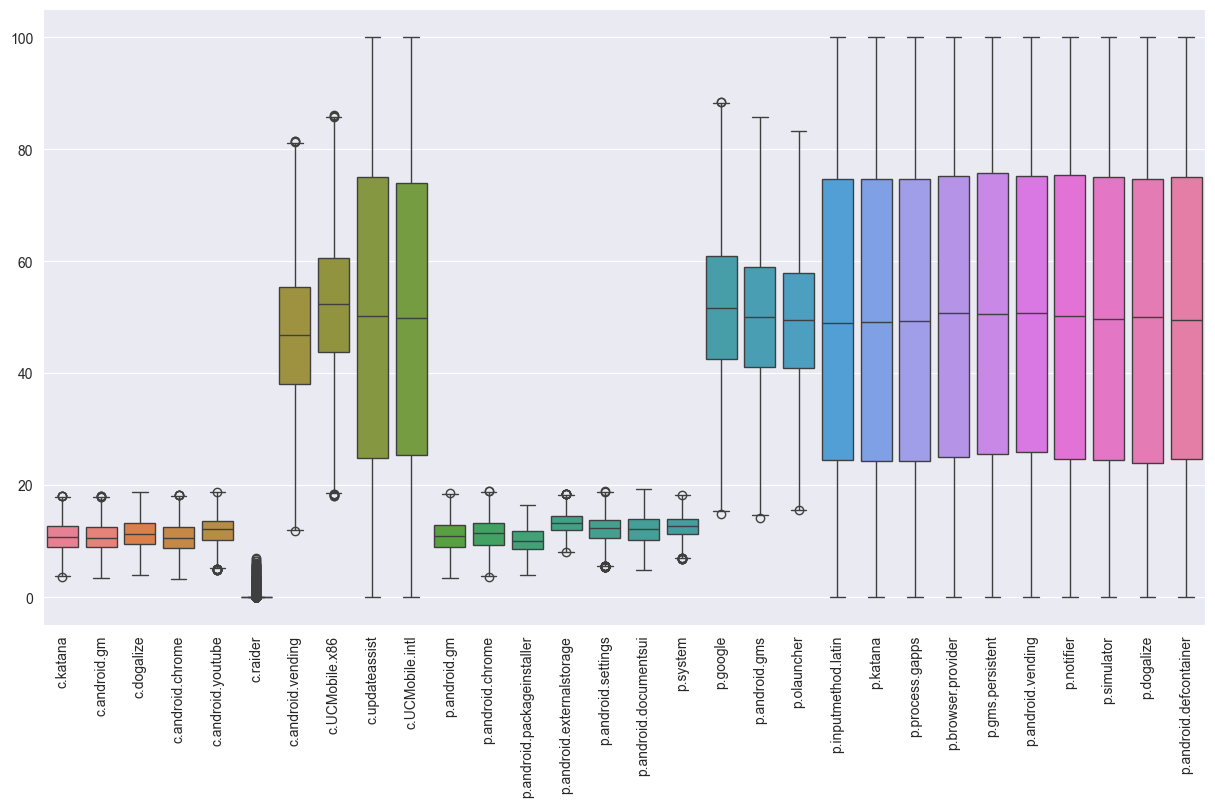

In [146]:
numeric_columns = x_train.columns
numeric_columns = [col for col in numeric_columns if col not in ['imei', 'mwra']]
    
plt.figure(figsize=(15, 8))
sns.boxplot(data=x_train[numeric_columns], orient='v')
plt.xticks(rotation=90)
plt.show()

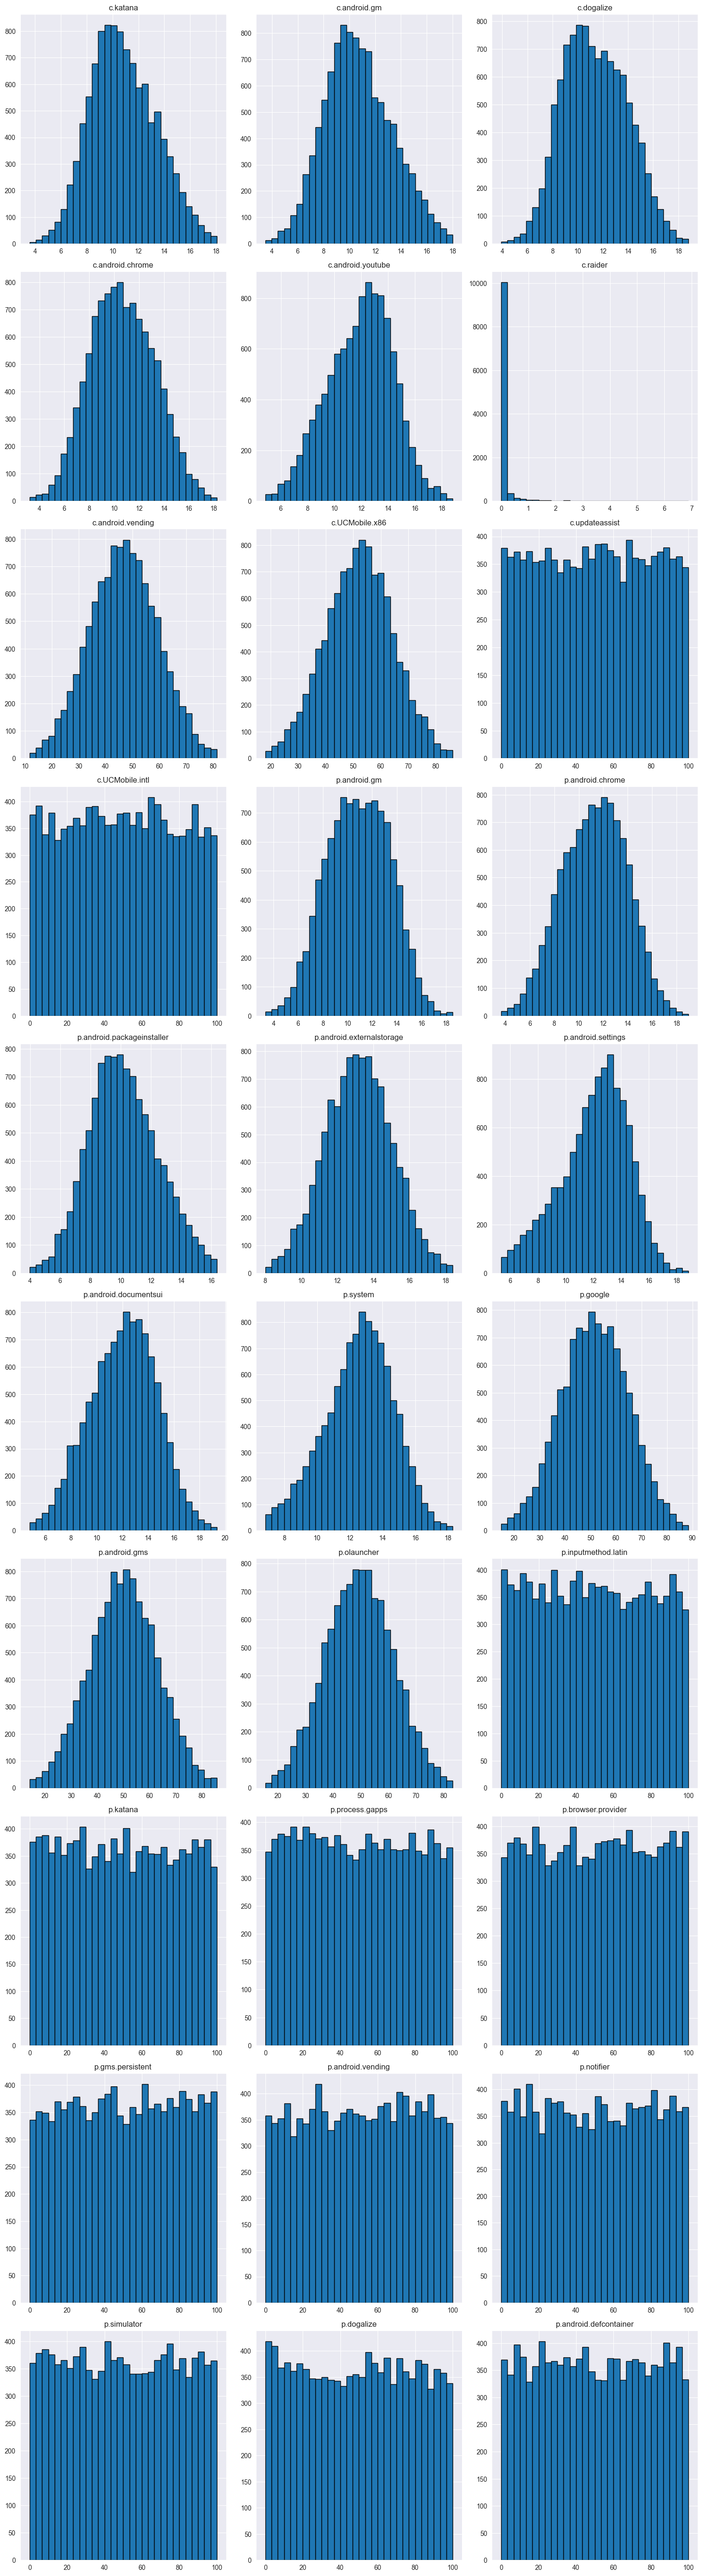

In [147]:
numeric_columns = [col for col in x_train.columns if col not in ['imei']]

num_cols = len(numeric_columns)
fig, axes = plt.subplots(nrows=num_cols // 3 + 1, ncols=3, figsize=(15, num_cols * 2))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    axes[i].hist(x_train[col].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [161]:
# Synchronizacia zaznamov x_train s y_train a reset indexov
y_train = y_train.loc[x_train.index]
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

### (C-2b) Transformujte atribúty dát pre strojové učenie podľa dostupných techník minimálne: scaling (2 techniky), transformers (2 techniky) a ďalšie. Cieľom je aby ste testovali efekty a vhodne kombinovali v dátovom pipeline (od časti 2.3 a v 3. fáze). 


In [162]:
minmax = ['c.android.chrome', 'c.android.youtube']
quantile = ['c.raider']
power = ['p.android.settings']

#### Quantile Transformation

In [163]:
# Pouzijeme quantile transformation na c.raider pretože ma pravosklonne rozlozenie s extremnymi hodnotami
transformer_quantile = QuantileTransformer(output_distribution='normal', random_state=0)
x_train[quantile] = transformer_quantile.fit_transform(x_train[quantile])

#### Power Tranformation (Yeo-Johnson)

In [164]:
power_transformer = PowerTransformer(method='yeo-johnson')
x_train[power] = power_transformer.fit_transform(x_train[power])

#### MinMaxScaler

In [165]:
scaler_minmax = MinMaxScaler()
x_train[minmax] = scaler_minmax.fit_transform(x_train[minmax])


#### StandardScaler

In [166]:
# Na ostatne atributy netreba pouzit ziadne tranformacie pretoze data maju skoro normalne symetricke rozlozenie
# Takze pouzijeme len skalovanie okrem 'c.android.chrome', 'c.android.youtube' kde sme uz pouzili MinMax
scaler_standard = StandardScaler()
columns_to_scale = [col for col in x_train.columns if col not in minmax]
columns_to_scale = [col for col in columns_to_scale if col not in ['imei']]
x_train[columns_to_scale] = scaler_standard.fit_transform(x_train[columns_to_scale])

### (D-1b) Zdôvodnite Vaše voľby/rozhodnutie pre realizáciu (t.j. zdokumentovanie)

#### 1. Quantile Transformation - Sme použili na atribut c.raider pretože ma velmi lavosklonne rozdelenie s extremnými hodnotami bližiace sa 0. Quantile Transformation prerozdeli hodnoty aby sa podobali na normálne rozdelenie
#### 2. Power Transformation - Tuto techniku sme sa rozhodli pouzit na atributy kt. maju pravosklonne alebo lavosklonne rozdelenie. Power Tranformation ich upravi tak aby boli viac symetrickejsie
#### 3. MinMax Scaler - Kedže sme odstranili extremne hodnoty v predchádzajúcom kroku mozme pouzit MinMax Scaler kt. skaluje atributy tak aby spadali do intervali 0-1
#### 4. StandardScaler - Kedze vacsina nasich atributov ma rozdelenie podobne normalnemu nepotrebujeme robit nejake transformacie ale upravit skalu atributov aby mali porovnatelny rozsah

## 2.2 Výber atribútov pre strojové učenie (5b)
### (A-3b) Zistite, ktoré atribúty (features) vo vašich dátach pre ML sú informatívne k predikovanej premennej (minimálne 3 techniky s porovnaním medzi sebou). 

In [167]:
spearman_corr = x_train.corrwith(y_train, method='spearman').sort_values(ascending=False)
top_spearman = spearman_corr.head(10)
top_spearman

c.android.youtube    0.555042
c.android.chrome     0.300426
p.system             0.288480
c.android.gm         0.252855
c.updateassist       0.019999
c.UCMobile.intl      0.012227
c.android.vending    0.010918
p.android.chrome     0.010100
p.process.gapps      0.009911
p.gms.persistent     0.009576
dtype: float64

In [168]:
pearson_corr = x_train.corrwith(y_train, method='pearson').sort_values(ascending=False)
top_pearson = pearson_corr.head(10)
top_pearson

c.android.youtube    0.550657
p.system             0.308274
c.android.chrome     0.291514
c.android.gm         0.255791
p.android.chrome     0.021285
c.updateassist       0.020033
c.UCMobile.intl      0.012195
c.android.vending    0.010060
p.process.gapps      0.009672
p.gms.persistent     0.009614
dtype: float64

In [169]:
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
top_rf = feature_importances.head(10)
top_rf

p.android.gm                  0.137083
c.katana                      0.127095
c.raider                      0.119216
c.android.youtube             0.106243
p.android.packageinstaller    0.047373
p.system                      0.047208
p.android.documentsui         0.034400
c.android.chrome              0.033270
c.android.gm                  0.032922
c.dogalize                    0.029879
dtype: float64

In [170]:
# Výpočet vzájomnej informácie medzi atribútmi a cieľovou premennou
mutual_info = mutual_info_classif(x_train, y_train, random_state=1)
mutual_info_series = pd.Series(mutual_info, index=x_train.columns).sort_values(ascending=False)

top_mutual_info = mutual_info_series.head(10)
top_mutual_info

c.raider                      0.193293
c.katana                      0.191397
c.android.youtube             0.178217
p.android.gm                  0.176691
p.system                      0.068162
p.android.settings            0.058563
c.android.chrome              0.057635
p.android.documentsui         0.055339
p.android.packageinstaller    0.052159
c.android.gm                  0.049758
dtype: float64

In [171]:
comparison_df = pd.DataFrame({
    'RandomForest_Importance': top_rf,
    'Spearman_Correlation': top_spearman,
    'Pearson_Correlation': top_pearson,
    'Mutual_Information': top_mutual_info
})

# Zobrazenie tabuľky s top 10 atribútmi z každej metódy
comparison_df

,RandomForest_Importance,Spearman_Correlation,Pearson_Correlation,Mutual_Information
c.UCMobile.intl,NaN,0.012227,0.012195,NaN
c.android.chrome,0.033270,0.300426,0.291514,0.057635
c.android.gm,0.032922,0.252855,0.255791,0.049758
c.android.vending,NaN,0.010918,0.010060,NaN
c.android.youtube,0.106243,0.555042,0.550657,0.178217
c.dogalize,0.029879,NaN,NaN,NaN
c.katana,0.127095,NaN,NaN,0.191397
c.raider,0.119216,NaN,NaN,0.193293
c.updateassist,NaN,0.019999,0.020033,NaN
p.android.chrome,NaN,0.010100,0.021285,NaN


<Figure size 1400x800 with 0 Axes>

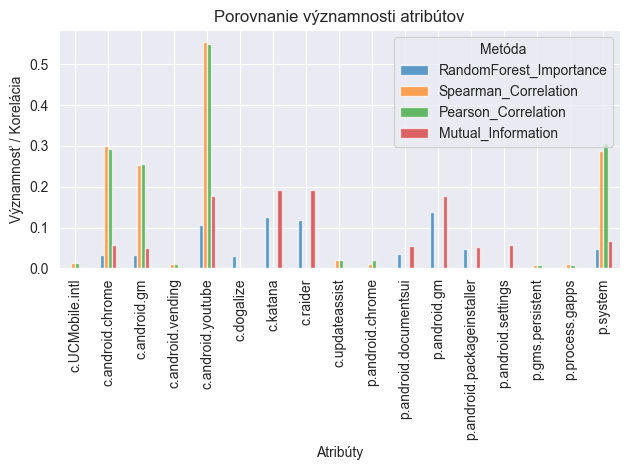

In [172]:
# Reset index pre porovnávaciu tabuľku
comparison_df = comparison_df.reset_index()

# Premaž stĺpec s indexom, aby sme mali "feature" ako stĺpec
comparison_df.rename(columns={'index': 'Feature'}, inplace=True)

# Vytvorenie grafu
plt.figure(figsize=(14, 8))
comparison_df.set_index('Feature').plot(kind='bar', alpha=0.7)
plt.title('Porovnanie významnosti atribútov')
plt.xlabel('Atribúty')
plt.ylabel('Významnosť / Korelácia')
plt.xticks(rotation=90)
plt.legend(title='Metóda', loc='upper right')
plt.tight_layout()
plt.show()

### (B-1b) Zoraďte zistené atribúty v poradí podľa dôležitosti. 

In [173]:
# Spojenie výsledkov do jedného dátového rámca
importance_df = pd.DataFrame({
    'Feature': comparison_df['Feature'],
    'RandomForest_Importance': comparison_df['RandomForest_Importance'],
    'Spearman_Correlation': comparison_df['Spearman_Correlation'],
    'Pearson_Correlation': comparison_df['Pearson_Correlation'],
    'Mutual_Information': comparison_df['Mutual_Information']
})

# Vyplnenie NaN hodnôt
importance_df.fillna(0, inplace=True)

# Spočítanie celkového skóre ako priemer významnosti a korelácií
importance_df['Total_Importance'] = (importance_df['RandomForest_Importance'] +
                                      importance_df['Spearman_Correlation'].abs() + 
                                      importance_df['Pearson_Correlation'].abs() + 
                                      importance_df['Mutual_Information']) / 4  # Teraz priemerujeme štyri hodnoty

# Zoradenie atribútov podľa celkového skóre
sorted_importance_df = importance_df.sort_values(by='Total_Importance', ascending=False)

# Zobrazenie výsledného zoradeného dátového rámca
print(sorted_importance_df[['Feature', 'Total_Importance']])


                       Feature  Total_Importance
4            c.android.youtube          0.347540
16                    p.system          0.178031
1             c.android.chrome          0.170711
2                 c.android.gm          0.147831
6                     c.katana          0.079623
11                p.android.gm          0.078443
7                     c.raider          0.078127
12  p.android.packageinstaller          0.024883
10       p.android.documentsui          0.022435
13          p.android.settings          0.014641
8               c.updateassist          0.010008
9             p.android.chrome          0.007846
5                   c.dogalize          0.007470
0              c.UCMobile.intl          0.006106
3            c.android.vending          0.005245
15             p.process.gapps          0.004896
14            p.gms.persistent          0.004797


In [174]:
def featureSelection(x,y,k=5):
    
    x_numeric = x.select_dtypes(include=['float64', 'int64'])
    
    selector = SelectKBest(mutual_info_classif, k=k)
    x_selected = selector.fit_transform(x_numeric, y)
    
     # Získanie názvov vybraných atribútov
    selected_features = x_numeric.columns[selector.get_support()].tolist()
    
    return x_selected, selected_features

In [175]:
x_selected, selected_features = featureSelection(x_train, y_train, k=10)
print("Vybrané atribúty:", selected_features)
print(x_selected)

Vybrané atribúty: ['c.katana', 'c.android.gm', 'c.android.chrome', 'c.android.youtube', 'c.raider', 'p.android.gm', 'p.android.packageinstaller', 'p.android.settings', 'p.android.documentsui', 'p.system']
[[-1.10008257  0.07431366  0.45156447 ...  2.33335806 -0.27590748
   0.44026943]
 [-0.68549082  2.33511165  0.44847852 ...  0.55460229  0.48159532
   0.76499035]
 [ 1.15476413 -0.3202114   0.53900997 ...  0.26492688  0.93352678
  -0.38004265]
 ...
 [-1.97698367  0.92984837  0.52062869 ...  0.33184483  1.2441035
   0.81769775]
 [-0.82017556  0.91671235  0.4846155  ... -0.32182843  1.08650155
   0.15194432]
 [-0.97444355  0.55413667  0.47261376 ... -2.21732029  0.02959054
   0.52736754]]


### (C-1b) Zdôvodnite Vaše voľby/rozhodnutie pre realizáciu (t.j. zdokumentovanie)

1. Random Forest Feature Importance: Tento prístup je založený na modeloch založených na stromoch a poskytuje odhad dôležitosti atribútov
2. Pearsonova korelácia: Tento prístup je užitočný na posúdenie lineárneho vzťahu medzi atribútmi a cieľovou premennou
3. Spearmanova korelácia: Tento prístup sa zameriava na monotónne vzťahy, čím poskytuje alternatívu k Pearsonovej korelácii.
4. Vzájomná informácia: Tento prístup hodnotí, ako veľmi je informácia o cieľovej premennej obsiahnutá v atribúte.
-- Znázornenie v tabuľke , grafom na pozorovanie hodnot
#### (b) 
1. Spojenie výsledkov do jedného dátového rámca a vyplnenie NaN hodnôt
2. Vyrátanie celkovej dôležitosti
3. Zoradenie a vypísanie výsledkov

## 2.3 Replikovateľnosť predspracovania (5b)
### (A-3b) Upravte váš kód realizujúci predspracovanie trénovacej množiny tak, aby ho bolo možné bez ďalších úprav znovu použiť na predspracovanie testovacej množiny v kontexte strojového učenia.

In [176]:
def prepareData(X,Y):
    columns_to_edit = [
        'c.android.gm', 'c.dogalize', 'c.android.chrome', 'c.android.youtube', 
        'c.katana', 'c.android.vending', 'c.UCMobile.x86', 'c.updateassist', 
        'c.UCMobile.intl', 'p.android.gm', 'p.android.chrome', 'p.android.packageinstaller', 
        'p.android.externalstorage', 'p.android.settings', 'p.android.documentsui', 
        'p.system', 'p.google', 'p.android.gms', 'p.olauncher', 'c.katana'
    ]
    
    for column in columns_to_edit:
        filter_outliers(X, column, action='delete')
        
    # Synchronizacia zaznamov x_train s y_train a reset indexov
    Y = Y.loc[X.index]
    X = X.reset_index(drop=True)
    Y = Y.reset_index(drop=True)
    
    return X,Y

### (B-2b) Využite možnosti sklearn.pipeline

In [177]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# k = pocet atributov kt. chcem aby selector vybral
def createPipeline(scaling='standard',transformation='quantile',k=10):
    
    # Na c.raider pouzijeme transformaciu
    if transformation == 'quantile':
        preprocessor = ColumnTransformer(
        transformers=[
            ('quantile', QuantileTransformer(output_distribution='normal', random_state=0), ['c.raider']),
        ],
        remainder='passthrough'  # Zvyšné stĺpce necháme zmeny, aby sme ich mohli následne škálovať
    )
    else:
          preprocessor = ColumnTransformer(
        transformers=[
            ('power', PowerTransformer(method='yeo-johnson', standardize=True), ['c.raider']),
        ],
        remainder='passthrough'
    )
        
    if scaling == 'standard':
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('scaler', StandardScaler()),
            ('feature_selection', SelectKBest(mutual_info_classif, k=k)),
        ])
    else:
         pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('scaler', RobustScaler()),
            ('feature_selection', SelectKBest(mutual_info_classif, k=k)),
        ])
    
    return pipeline

In [178]:
# Rozdelenie dat na trenovaciu a testovaciu sadu
X = df.drop(columns='mwra')
Y = df['mwra']
x_Train, x_Test, y_Train, y_Test =  train_test_split(X, Y, test_size=0.2, random_state=1)

In [179]:
# Vytvorenie pipeline
# S atributmi scaling a transformation mozem vytvorit rozne pipeliny
pipeline = createPipeline(k=10)

In [180]:
x_Train, y_Train = prepareData(x_Train, y_Train)

In [181]:
transformed_data = pipeline.fit_transform(x_Train, y_Train)

# Vytiahneme si nazvy vsetkych atributov
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Vyberieme len atribúty, ktoré vybral SelectKBest
selected_features = [feature_names[i] for i in range(len(feature_names)) if pipeline.named_steps['feature_selection'].get_support()[i]]
selected_features = [name.split('__')[-1] for name in selected_features]


transformed_df = pd.DataFrame(transformed_data, columns=selected_features)
transformed_df.head()


,c.raider,c.katana,c.android.gm,c.android.chrome,c.android.youtube,p.android.gm,p.android.packageinstaller,p.android.settings,p.android.documentsui,p.system
0,-1.059197,-1.101060,0.074093,-0.261479,0.004484,-0.441415,-0.558540,2.049122,-0.275529,0.440192
1,-0.624128,-0.685779,2.334975,-0.279454,0.232338,-1.115357,0.176648,0.586567,0.481932,0.764864
2,1.076074,1.157535,-0.320446,0.247848,-0.961689,0.686199,1.584407,0.322061,0.933839,-0.379998
3,-0.114260,-0.203379,-1.058163,0.922737,0.275180,-0.479005,-0.035671,-0.699872,-0.633592,-0.483773
4,0.382721,0.353069,2.164476,-0.190370,0.776281,-1.039782,0.753898,-0.187968,0.832174,0.178570


# 3.Faza Strojové učenie

## 3.1 Jednoduchý klasifikátor na základe závislosti v dátach  (5b)
### (A-3b) Naimplementujte jednoduchý ID3 klasifikátor s hĺbkou min 2 (vrátane root/koreň). 

### (B-1b) Vyhodnoťte Váš ID3 klasifikátor pomocou metrík accuracy, precision a recall.

### (C-1b) Zístite či Váš ID3 klasifikátor má overfit.

## 3.2 Trénovanie a vyhodnotenie klasifikátorov strojového učenia (5b)
### (A-1b) Na trénovanie využite jeden stromový algoritmus v scikit-learn.

### (B-1b) Porovnajte s jedným iným nestromovým algoritmom v scikit-learn.

### (C-1b) Porovnajte výsledky s ID3 z prvého kroku.

### (D-1b) Vizualizujte natrénované pravidlá minimálne pre jeden Vami vybraný algoritmus

### (E-1b) Vyhodnoťte natrénované modely pomocou metrík accuracy, precision a recall

## 3.3 Optimalizácia alias hyperparameter tuning (5b)
### (A-1b) Vyskúšajte rôzne nastavenie hyperparametrov (tuning) pre zvolený algoritmus tak, aby ste optimalizovali výkonnosť (bez underfitingu)

### (B-1b) Vyskúšajte kombinácie modelov (ensemble) pre zvolený algoritmus tak, aby ste optimalizovali výkonnosť (bez underfitingu)

### (C-1b) Využite krížovú validáciu (cross validation) na trénovacej množine.

### (D-2b) Dokážte že Váš nastavený najlepší model je bez overfitingu.

## 3.4 Vyhodnotenie vplyvu zvolenej stratégie riešenia na klasifikáciu (5b) 
### (A-1b) Stratégie riešenia chýbajúcich hodnôt a outlierov

### (B-1b) Dátová transformácia (scaling, transformer, …)

### (C-1b) Výber atribútov, výber algoritmov, hyperparameter tuning, ensemble learning

### (D-1b) Ktorý model je Váš najlepší model pre nasadenie (deployment)? 

### (E-1b) Aký je data pipeline pre jeho vybudovanie na základe Vášho datasetu v produkcii?